## Overall Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
excel_file = '/content/drive/MyDrive/shortaxis_binary v2.xlsx'

# Create an ExcelFile object
xls = pd.ExcelFile(excel_file)

# Get a list of sheet names
sheet_names = xls.sheet_names

# Display the sheet names
print(sheet_names)

['SAMPLE NEW DATA SHEET', 'LPPILOTLAT1', 'LPPILOTLAT2', 'LPPILOTLAT3', 'LPPILOTSITTING2', 'LP SONO 001 POST FNL CONUS', 'LP SONO 001 POST FST CONUS', '01.09.31 hrs __0025097', '01.09.47 hrs __0025098', 'AM12 (Converted)', 'BM12 (Converted)', 'US00000L', 'XM12 (Converted)', 'YM12 (Converted)']


In [3]:
# Load the Excel file
excel_file = '/content/drive/MyDrive/shortaxis_binary v2.xlsx'

# Read all sheets into a dictionary of DataFrames
sheets_list = []
for i in tqdm(sheet_names[1:]):
  df_i = pd.read_excel(excel_file, sheet_name=i)
  cols = list(df_i.columns[:7])
  sheets_list.append(df_i[cols])

# Concatenate all the DataFrames from each sheet
combined_df = pd.concat(sheets_list, axis=0)

# Display the combined DataFrame
combined_df

100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


FILENAME  BAD QUALITY  CORD  FLUID PARTIAL OBSTRUCTION  \
0    LPPILOTLAT1_0.jpg          1.0   0.0    0.0                   0   
1    LPPILOTLAT1_1.jpg          1.0   0.0    0.0                   0   
2    LPPILOTLAT1_2.jpg          1.0   0.0    0.0                   0   
3    LPPILOTLAT1_3.jpg          1.0   0.0    0.0                   0   
4    LPPILOTLAT1_4.jpg          1.0   0.0    0.0                   0   
..                 ...          ...   ...    ...                 ...   
368       YM12_368.jpg          0.0   0.0    0.0                   0   
369       YM12_369.jpg          0.0   0.0    0.0                   0   
370       YM12_370.jpg          0.0   0.0    0.0                   0   
371       YM12_371.jpg          0.0   0.0    0.0                   0   
372       YM12_372.jpg          0.0   0.0    0.0                   0   

     NO FLUID good quality  CONUS  
0                      0.0    0.0  
1                      0.0    0.0  
2                      0.0    0.0  
3                      0.0    0.0  
4                      0.0    0.0  
..                     ...    ...  
368                    1.0    0.0  
369                    1.0    0.0  
370                    1.0    0.0  
371                    1.0    0.0  
372                    1.0    0.0  

[3393 rows x 7 columns]

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3393 entries, 0 to 372
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FILENAME               3390 non-null   object 
 1   BAD QUALITY            3390 non-null   float64
 2   CORD                   3390 non-null   float64
 3   FLUID                  3390 non-null   float64
 4   PARTIAL OBSTRUCTION    3391 non-null   object 
 5   NO FLUID good quality  3323 non-null   float64
 6   CONUS                  3390 non-null   float64
dtypes: float64(5), object(2)
memory usage: 212.1+ KB


In [5]:
import pandas as pd
import numpy as np

# Assume `column_names` is the list of columns you are interested in
# Example: column_names = ['BAD QUALITY', 'OTHER COLUMN', ...]

# Create an empty DataFrame to store the counts
column_names = list(combined_df.columns[1:])
counts_df = pd.DataFrame()

# Iterate over each column and count the occurrences of 0, 1, and NaN
for col in column_names:
    counts = combined_df[col].value_counts(dropna=False)

    # Create a DataFrame from the counts with index as [0, 1, NaN] and append it
    counts_df[col] = counts.reindex([0, 1, np.nan], fill_value=0)

# Fill NaN values with 0 (in the final counts DataFrame)
counts_df.fillna(0, inplace=True)

# Display the counts DataFrame
counts_df

BAD QUALITY  CORD  FLUID  PARTIAL OBSTRUCTION  \
BAD QUALITY                                                  
0.0                 2872  2646    864                 2874   
1.0                  518   744   2526                  516   
NaN                    3     3      3                    2   

             NO FLUID good quality  CONUS  
BAD QUALITY                                
0.0                           3109   3200  
1.0                            214    190  
NaN                             70      3

In [6]:
# Normalize each column so that the sum is 100%
counts_df_normalized = counts_df.div(counts_df.sum(axis=0), axis=1) * 100

# Display the normalized DataFrame
counts_df_normalized

BAD QUALITY       CORD      FLUID  PARTIAL OBSTRUCTION  \
BAD QUALITY                                                           
0.0            84.644857  77.984085  25.464191            84.728774   
1.0            15.266726  21.927498  74.447392            15.212264   
NaN             0.088417   0.088417   0.088417             0.058962   

             NO FLUID good quality      CONUS  
BAD QUALITY                                    
0.0                      91.629826  94.311818  
1.0                       6.307103   5.599764  
NaN                       2.063071   0.088417

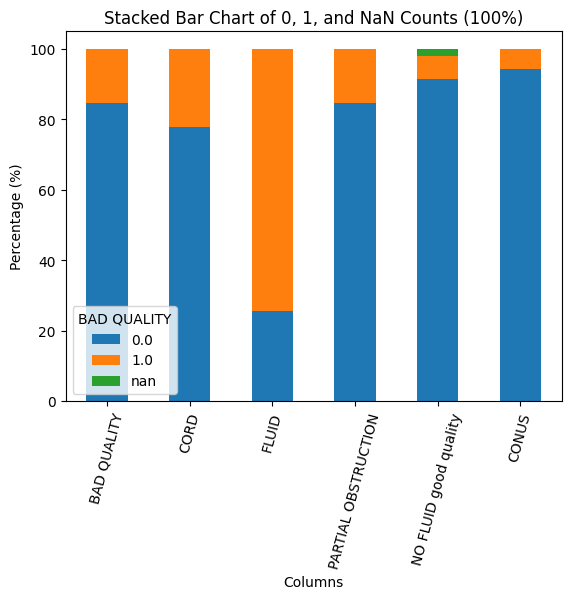

In [7]:
# Plot the stacked bar chart
counts_df_normalized.T.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Stacked Bar Chart of 0, 1, and NaN Counts (100%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=75)

# Display the plot
plt.show()

In [8]:
# import shutil

# # Specify the folder path you want to delete
# folder_path = '/content/New videos folder LP AI SUMMER 2024 Frames Resized'

# # Delete the folder and its contents
# shutil.rmtree(folder_path)

In [11]:
# import cv2
# import os

# # Path to your video file
# new_videos = '/content/drive/MyDrive/New videos folder LP AI SUMMER 2024/FLUID positive examples'
# for i in tqdm(os.listdir(new_videos)):
#   video_path = os.path.join(new_videos, i)

#   # Create a directory to store the extracted frames
#   output_dir = f'/content/New videos folder LP AI SUMMER 2024 Frames/{new_videos.split("/")[-1]}/{video_path.split("/")[-1].split(".")[0]}'
#   if not os.path.exists(output_dir):
#       os.makedirs(output_dir)

#   # Open the video file
#   cap = cv2.VideoCapture(video_path)

#   # Initialize frame count
#   frame_count = 0

#   # Loop through the video and extract frames
#   while True:
#       ret, frame = cap.read()  # Read each frame
#       if not ret:
#           break  # Break the loop if no more frames are left

#       # Save the current frame as an image file
#       frame_filename = os.path.join(output_dir, f'frame_{frame_count:05d}.jpg')
#       cv2.imwrite(frame_filename, frame[:,:int(frame.shape[1]*0.85),:])

#       frame_count += 1

#   # Release the video capture object
#   cap.release()

#   print(f"Extracted {frame_count} frames from the video - {video_path.split('/')[-1]}")

import cv2
import os
from tqdm import tqdm  # Add tqdm for progress bar


output_size = (532, 434)
# Path to your video file folder
new_videos = '/content/drive/MyDrive/New videos folder LP AI SUMMER 2024/FLUID positive examples'

for i in tqdm(os.listdir(new_videos)):
    video_path = os.path.join(new_videos, i)

    # Create a directory to store the extracted frames
    output_dir = f'/content/New videos folder LP AI SUMMER 2024 Frames Resized/{new_videos.split("/")[-1]}/{video_path.split("/")[-1].split(".")[0]}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the frames per second (FPS) of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(f"FPS of the video: {fps}")

    # Get the total frame count of the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames in the video: {total_frames}")

    # Initialize frame count
    frame_count = 0
    saved_frame_count = 0

    # Loop through the video and extract all frames according to the FPS
    while frame_count < total_frames:
        ret, frame = cap.read()  # Read each frame
        if not ret:
            break  # Break the loop if no more frames are left

        # Save the current frame
        frame_filename = os.path.join(output_dir, f'frame_{saved_frame_count:05d}.jpg')
        cropped_frame = frame[:, :int(frame.shape[1] * 0.85), :]
        resized_frame = cv2.resize(cropped_frame, output_size)
        cv2.imwrite(frame_filename, resized_frame)  # Crop and save
        saved_frame_count += 1

        frame_count += 1

    # Release the video capture object
    cap.release()

print(f"Total frames saved: {saved_frame_count}")

  0%|          | 0/8 [00:00<?, ?it/s]

FPS of the video: 16.0
Total number of frames in the video: 50


 12%|█▎        | 1/8 [00:00<00:06,  1.09it/s]

FPS of the video: 16.0
Total number of frames in the video: 50


 25%|██▌       | 2/8 [00:01<00:05,  1.04it/s]

FPS of the video: 16.0
Total number of frames in the video: 50


 38%|███▊      | 3/8 [00:03<00:05,  1.09s/it]

FPS of the video: 16.0
Total number of frames in the video: 50


 50%|█████     | 4/8 [00:04<00:04,  1.13s/it]

FPS of the video: 16.0
Total number of frames in the video: 50


 62%|██████▎   | 5/8 [00:04<00:02,  1.07it/s]

FPS of the video: 14.0
Total number of frames in the video: 42


 75%|███████▌  | 6/8 [00:05<00:01,  1.15it/s]

FPS of the video: 14.0
Total number of frames in the video: 42


 88%|████████▊ | 7/8 [00:06<00:00,  1.08it/s]

FPS of the video: 18.0
Total number of frames in the video: 55


100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

Total frames saved: 55


In [12]:
# import shutil

# # Path to the folder you want to copy (in Colab runtime)
# source_folder = '/content/New videos folder LP AI SUMMER 2024 Frames Resized'

# # Destination path in Google Drive
# destination_folder = '/content/drive/My Drive/New Image Frames LP Resized 434x532'

# # Copy the folder
# shutil.copytree(source_folder, destination_folder)

# print(f"Folder '{source_folder}' has been copied to '{destination_folder}'.")

## Analyzing FLUID POSITIVE Images

In [13]:
old_fluid_positive = combined_df[combined_df['FLUID']==1]

In [14]:
old_fluid_positive

FILENAME  BAD QUALITY  CORD  FLUID PARTIAL OBSTRUCTION  \
32   LPPILOTLAT1_32.jpg          0.0   0.0    1.0                   0   
33   LPPILOTLAT1_33.jpg          0.0   0.0    1.0                   0   
34   LPPILOTLAT1_34.jpg          0.0   0.0    1.0                   0   
35   LPPILOTLAT1_35.jpg          0.0   0.0    1.0                   0   
36   LPPILOTLAT1_36.jpg          0.0   0.0    1.0                   0   
..                  ...          ...   ...    ...                 ...   
319        YM12_319.jpg          0.0   0.0    1.0                   0   
320        YM12_320.jpg          0.0   0.0    1.0                   0   
321        YM12_321.jpg          0.0   0.0    1.0                   0   
322        YM12_322.jpg          0.0   0.0    1.0                   0   
323        YM12_323.jpg          0.0   0.0    1.0                   0   

     NO FLUID good quality  CONUS  
32                     0.0    0.0  
33                     0.0    0.0  
34                     0.0    0.0  
35                     0.0    0.0  
36                     0.0    0.0  
..                     ...    ...  
319                    0.0    0.0  
320                    0.0    0.0  
321                    0.0    0.0  
322                    0.0    0.0  
323                    0.0    0.0  

[2526 rows x 7 columns]

In [15]:
old_fluid_positive['folder'] = old_fluid_positive['FILENAME'].apply(lambda x: x.split('_')[0])
old_fluid_positive

<ipython-input-15-9fe94448e2b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_fluid_positive['folder'] = old_fluid_positive['FILENAME'].apply(lambda x: x.split('_')[0])


FILENAME  BAD QUALITY  CORD  FLUID PARTIAL OBSTRUCTION  \
32   LPPILOTLAT1_32.jpg          0.0   0.0    1.0                   0   
33   LPPILOTLAT1_33.jpg          0.0   0.0    1.0                   0   
34   LPPILOTLAT1_34.jpg          0.0   0.0    1.0                   0   
35   LPPILOTLAT1_35.jpg          0.0   0.0    1.0                   0   
36   LPPILOTLAT1_36.jpg          0.0   0.0    1.0                   0   
..                  ...          ...   ...    ...                 ...   
319        YM12_319.jpg          0.0   0.0    1.0                   0   
320        YM12_320.jpg          0.0   0.0    1.0                   0   
321        YM12_321.jpg          0.0   0.0    1.0                   0   
322        YM12_322.jpg          0.0   0.0    1.0                   0   
323        YM12_323.jpg          0.0   0.0    1.0                   0   

     NO FLUID good quality  CONUS       folder  
32                     0.0    0.0  LPPILOTLAT1  
33                     0.0    0.0  LPPILOTLAT1  
34                     0.0    0.0  LPPILOTLAT1  
35                     0.0    0.0  LPPILOTLAT1  
36                     0.0    0.0  LPPILOTLAT1  
..                     ...    ...          ...  
319                    0.0    0.0         YM12  
320                    0.0    0.0         YM12  
321                    0.0    0.0         YM12  
322                    0.0    0.0         YM12  
323                    0.0    0.0         YM12  

[2526 rows x 8 columns]

In [16]:
old_fluid_positive['file'] = old_fluid_positive['FILENAME'].apply(lambda x: x.split('_')[-1])
old_fluid_positive

<ipython-input-16-8491bda2cd6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_fluid_positive['file'] = old_fluid_positive['FILENAME'].apply(lambda x: x.split('_')[-1])


FILENAME  BAD QUALITY  CORD  FLUID PARTIAL OBSTRUCTION  \
32   LPPILOTLAT1_32.jpg          0.0   0.0    1.0                   0   
33   LPPILOTLAT1_33.jpg          0.0   0.0    1.0                   0   
34   LPPILOTLAT1_34.jpg          0.0   0.0    1.0                   0   
35   LPPILOTLAT1_35.jpg          0.0   0.0    1.0                   0   
36   LPPILOTLAT1_36.jpg          0.0   0.0    1.0                   0   
..                  ...          ...   ...    ...                 ...   
319        YM12_319.jpg          0.0   0.0    1.0                   0   
320        YM12_320.jpg          0.0   0.0    1.0                   0   
321        YM12_321.jpg          0.0   0.0    1.0                   0   
322        YM12_322.jpg          0.0   0.0    1.0                   0   
323        YM12_323.jpg          0.0   0.0    1.0                   0   

     NO FLUID good quality  CONUS       folder     file  
32                     0.0    0.0  LPPILOTLAT1   32.jpg  
33                     0.0    0.0  LPPILOTLAT1   33.jpg  
34                     0.0    0.0  LPPILOTLAT1   34.jpg  
35                     0.0    0.0  LPPILOTLAT1   35.jpg  
36                     0.0    0.0  LPPILOTLAT1   36.jpg  
..                     ...    ...          ...      ...  
319                    0.0    0.0         YM12  319.jpg  
320                    0.0    0.0         YM12  320.jpg  
321                    0.0    0.0         YM12  321.jpg  
322                    0.0    0.0         YM12  322.jpg  
323                    0.0    0.0         YM12  323.jpg  

[2526 rows x 9 columns]

In [17]:
old_fluid_positive['folder'] = old_fluid_positive['folder'].apply(lambda x: x.strip())
old_fluid_positive['rel_path'] = old_fluid_positive.apply(lambda row: row['folder'] + '/' + row['file'], axis=1)
old_fluid_positive

<ipython-input-17-e575e2c24672>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_fluid_positive['folder'] = old_fluid_positive['folder'].apply(lambda x: x.strip())
<ipython-input-17-e575e2c24672>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_fluid_positive['rel_path'] = old_fluid_positive.apply(lambda row: row['folder'] + '/' + row['file'], axis=1)


FILENAME  BAD QUALITY  CORD  FLUID PARTIAL OBSTRUCTION  \
32   LPPILOTLAT1_32.jpg          0.0   0.0    1.0                   0   
33   LPPILOTLAT1_33.jpg          0.0   0.0    1.0                   0   
34   LPPILOTLAT1_34.jpg          0.0   0.0    1.0                   0   
35   LPPILOTLAT1_35.jpg          0.0   0.0    1.0                   0   
36   LPPILOTLAT1_36.jpg          0.0   0.0    1.0                   0   
..                  ...          ...   ...    ...                 ...   
319        YM12_319.jpg          0.0   0.0    1.0                   0   
320        YM12_320.jpg          0.0   0.0    1.0                   0   
321        YM12_321.jpg          0.0   0.0    1.0                   0   
322        YM12_322.jpg          0.0   0.0    1.0                   0   
323        YM12_323.jpg          0.0   0.0    1.0                   0   

     NO FLUID good quality  CONUS       folder     file            rel_path  
32                     0.0    0.0  LPPILOTLAT1   32.jpg  LPPILOTLAT1/32.jpg  
33                     0.0    0.0  LPPILOTLAT1   33.jpg  LPPILOTLAT1/33.jpg  
34                     0.0    0.0  LPPILOTLAT1   34.jpg  LPPILOTLAT1/34.jpg  
35                     0.0    0.0  LPPILOTLAT1   35.jpg  LPPILOTLAT1/35.jpg  
36                     0.0    0.0  LPPILOTLAT1   36.jpg  LPPILOTLAT1/36.jpg  
..                     ...    ...          ...      ...                 ...  
319                    0.0    0.0         YM12  319.jpg        YM12/319.jpg  
320                    0.0    0.0         YM12  320.jpg        YM12/320.jpg  
321                    0.0    0.0         YM12  321.jpg        YM12/321.jpg  
322                    0.0    0.0         YM12  322.jpg        YM12/322.jpg  
323                    0.0    0.0         YM12  323.jpg        YM12/323.jpg  

[2526 rows x 10 columns]

In [18]:
import cv2

In [19]:
pd.unique(old_fluid_positive['folder'])

array(['LPPILOTLAT1', 'LPPILOTLAT2', 'LPPILOTLAT3', 'LPPILOTSITTING2',
       'LP SONO 001 POST FNL CONUS', 'LP SONO 001 POST FST CONUS',
       '01.09.31 hrs', '01.09.47 hrs', 'AM12', 'BM12', 'US00000L', 'XM12',
       'YM12'], dtype=object)

In [20]:
base_path = '/content/drive/MyDrive/short axis frames'
images = []
for i in tqdm(range(old_fluid_positive.shape[0])):
  rel_path = old_fluid_positive.iloc[i,-1]
  abs_path = os.path.join(base_path, rel_path)

  image = cv2.imread(abs_path)
  images.append(image)

100%|██████████| 2526/2526 [15:40<00:00,  2.69it/s]


In [21]:
type(images)

list

In [22]:
non_nan_images = [i for i in images if i is not None]

In [23]:
import os
import cv2
import numpy as np
# from glob import glob

# Function to calculate average intensity and contrast for a set of images in a folder
def analyze_images_in_folder(image_list):
    # image_paths = glob(os.path.join(folder_path, '*.jpg'))  # Adjust extension if necessary
    avg_intensity = []
    contrast_values = []

    for image in image_list:
        # Load the image
        # image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # if image is None:
        #     print(f"Error loading image: {image_path}")
        #     continue

        # Calculate average pixel intensity
        mean_intensity = np.mean(image)
        avg_intensity.append(mean_intensity)

        # Calculate contrast (standard deviation of pixel intensity)
        contrast = np.std(image)
        contrast_values.append(contrast)

    # Average across all images
    avg_intensity = np.mean(avg_intensity) if avg_intensity else 0
    avg_contrast = np.mean(contrast_values) if contrast_values else 0

    return avg_intensity, avg_contrast

# Analyze both folders
avg_intensity1, contrast1 = analyze_images_in_folder(non_nan_images)
# avg_intensity2, contrast2 = analyze_images_in_folder(folder2)

# Display results
print(f"Old Fluid Positive Images - Average Intensity: {avg_intensity1:.10f}, Average Contrast: {contrast1:.10f}")
# print(f"Folder 2 - Average Intensity: {avg_intensity2:.2f}, Average Contrast: {contrast2:.2f}")

# Comparison
# intensity_diff = abs(avg_intensity1 - avg_intensity2)
# contrast_diff = abs(contrast1 - contrast2)
# print(f"Difference in Average Intensity: {intensity_diff:.2f}")
# print(f"Difference in Average Contrast: {contrast_diff:.2f}")

Old Fluid Positive Images - Average Intensity: 25.8849152357, Average Contrast: 23.7733707698


In [51]:
def load_images_from_folder(root_folder):
    image_paths = []

    # Recursively walk through all subfolders and files
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an image (you can add more extensions as needed)
            if file.endswith('.jpg'):
                image_paths.append(os.path.join(root, file))

    images = []

    # Load all images using OpenCV
    for path in tqdm(image_paths):
        image = cv2.imread(path)

        if image is not None:
            images.append(image)
        else:
            print(f"Failed to load image: {path}")

    return images, image_paths

# Example usage
root_folder = '/content/drive/MyDrive/New Image Frames LP Resized 434x532'
loaded_images, loaded_image_paths = load_images_from_folder(root_folder)

print(f"Loaded {len(loaded_images)} images from {len(loaded_image_paths)} paths.")


100%|██████████| 681/681 [04:07<00:00,  2.76it/s]

Loaded 681 images from 681 paths.


In [52]:
len(loaded_images)

681

In [53]:
avg_intensity2, contrast2 = analyze_images_in_folder(loaded_images)
# avg_intensity2, contrast2 = analyze_images_in_folder(folder2)

# Display results
print(f"New Fluid Positive Images - Average Intensity: {avg_intensity2:.10f}, Average Contrast: {contrast2:.10f}")

New Fluid Positive Images - Average Intensity: 31.6982683919, Average Contrast: 30.8727601307


In [54]:
old_image_intensity = [np.mean(i) for i in non_nan_images]
new_image_intensity = [np.mean(i) for i in loaded_images]

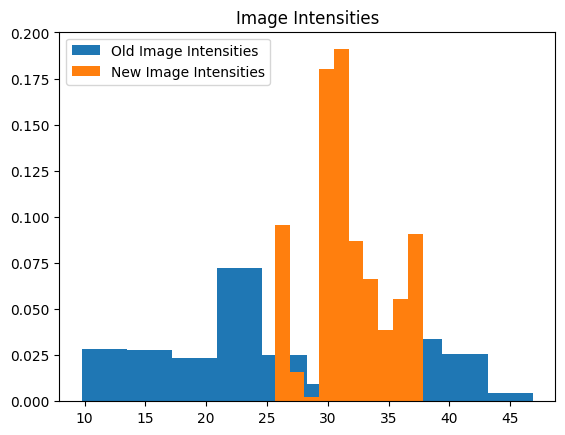

In [55]:

plt.hist(old_image_intensity, density=True, label='Old Image Intensities')
plt.hist(new_image_intensity, density=True, label='New Image Intensities')

plt.legend(loc='best')
plt.title('Image Intensities')
plt.show()

In [56]:
old_image_contrasts = [np.std(i) for i in non_nan_images]
new_image_contrasts = [np.std(i) for i in loaded_images]

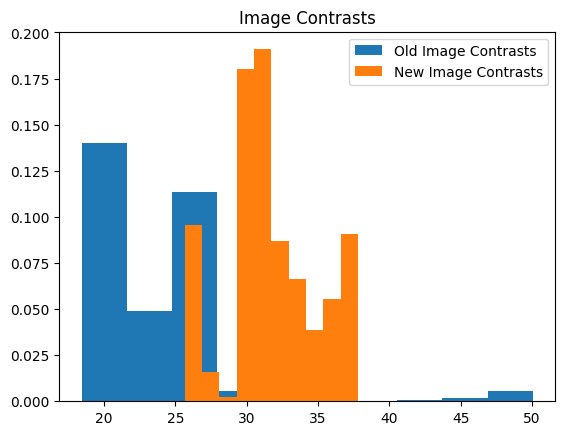

In [57]:
plt.hist(old_image_contrasts, density=True, label='Old Image Contrasts')
plt.hist(new_image_intensity, density=True, label='New Image Contrasts')

plt.legend(loc='best')
plt.title('Image Contrasts')
plt.show()

In [58]:
non_nan_images[0].shape

(434, 532, 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
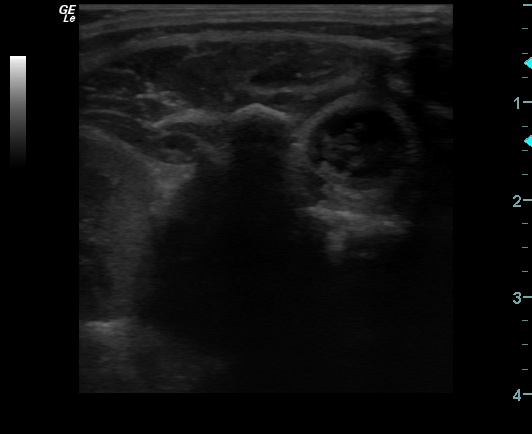

In [59]:
non_nan_images[0]

In [60]:
loaded_images[0].shape

(434, 532, 3)

array([[[33, 27, 22],
        [30, 24, 19],
        [31, 23, 16],
        ...,
        [31, 25, 18],
        [31, 25, 18],
        [31, 25, 18]],

       [[27, 21, 16],
        [32, 26, 21],
        [35, 26, 22],
        ...,
        [31, 25, 18],
        [31, 25, 18],
        [31, 25, 18]],

       [[30, 23, 20],
        [32, 25, 22],
        [25, 18, 15],
        ...,
        [29, 23, 16],
        [29, 23, 16],
        [29, 23, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)
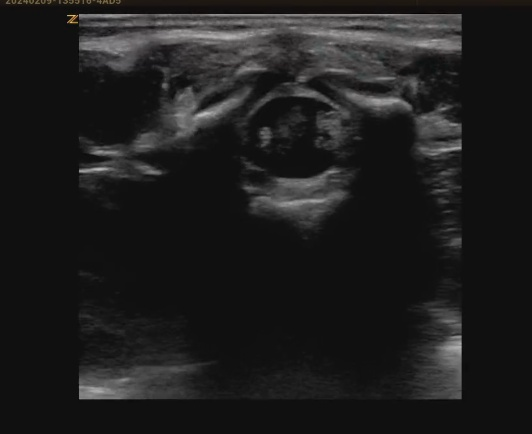

In [61]:
loaded_images[0]

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.metrics import structural_similarity as ssim
from skimage.color import rgb2gray
from scipy.fft import fft2, fftshift

# Function to compute SSIM between two images
def compare_images(image1, image2):
    # Convert to grayscale for SSIM
    gray1 = rgb2gray(image1)
    gray2 = rgb2gray(image2)

    if gray1.dtype == np.float32 or gray1.dtype == np.float64:
        data_range = 1.0  # Assuming images are normalized between 0 and 1
    else:
        data_range = 255  # If the images are in range [0, 255]

    # Compute SSIM between two grayscale images
    score, diff = ssim(gray1, gray2, data_range=data_range, full=True)
    return score, diff

# Function to apply FFT and visualize frequency changes
def apply_fft(image):
    gray = rgb2gray(image)
    f_transform = fftshift(fft2(gray))
    magnitude_spectrum = np.log(np.abs(f_transform) + 1)  # Log scaling for visualization
    return magnitude_spectrum

In [66]:
sc1, diff1 = compare_images(non_nan_images[0], loaded_images[0])

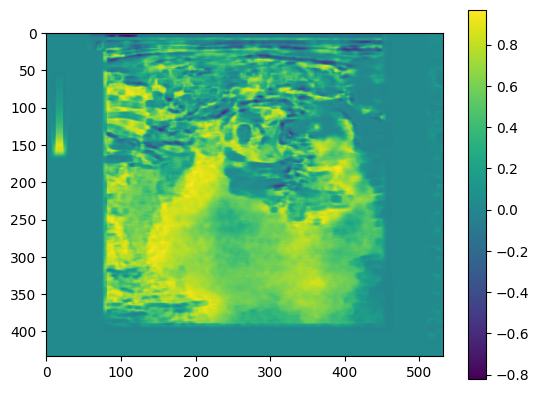

In [67]:
plt.imshow(diff1)
plt.colorbar()

A pixel-wise difference map is a matrix that highlights the differences between two images at the pixel level. In the context of SSIM (Structural Similarity Index), it specifically shows how the luminance, contrast, and structure of the images differ locally. Each pixel in this map represents the local similarity or dissimilarity between corresponding pixels in two images.

In the SSIM process:

Bright areas in the difference map indicate that the corresponding regions in the two images are similar (high structural similarity).
Darker areas indicate dissimilarities (low structural similarity).
How is the SSIM Difference Map Calculated?
The SSIM difference map is calculated using the Structural Similarity Index (SSIM), which compares two images based on three factors:

<ul>
 <li> Luminance (brightness) comparison. </li>
 <li> Contrast comparison. </li>
 <li>item Structure comparison.</li>
</ul>

The SSIM between two images $x$ and $y$ is defined as follows: $$SSIM(x,y) = l(x,y)^{\alpha} \cdot c(x,y)^{\beta} \cdot s(x,y)^{\gamma}$$

where

<ul>

<li>$l(x,y)$: Luminance Comparison</li>
<li>$c(x,y)$: Contrast Comparison</li>
<li>$s(x,y)$: Structure Comparison</li>
<li>$\alpha, \beta, \gamma$: Parameters used to adjust the relative importance of luminance, contrast, and structure. Typically, $\alpha=\beta=\gamma=1$</li>
</ul>

### Luminance $l(x,y)$

$$l(x,y) = \dfrac{2\mu_x\mu_y + \epsilon}{\mu_x^2 + \mu_y^2 + \epsilon}$$

where $\mu_x \;\& \;\mu_y$ are the mean intensities of image 1 and 2 respectively, and $\epsilon$ is a small constant to avoid zero division error.

### Contrast Comparison $c(x,y)$

$$c(x,y) = \dfrac{2\sigma_x\sigma_y+\epsilon}{\sigma_x^2 + \sigma_y^2 +\epsilon}$$

where $\sigma_x \; \& \; \sigma_y$ are the standard deviations (contrast) of images 1 and 2 respectively, and $\epsilon$ is a small constant to avoid zero division error.

### Structure COmparison $s(x,y)$

$$s(x,y) = \dfrac{\sigma_{xy}+\epsilon^{\prime}}{\sigma_x \sigma_y + \epsilon^{\prime}}$$

where $\sigma_{xy}$ is the covariance between the images, and $\epsilon^{\prime}$ is a constant derived from $\epsilon$.

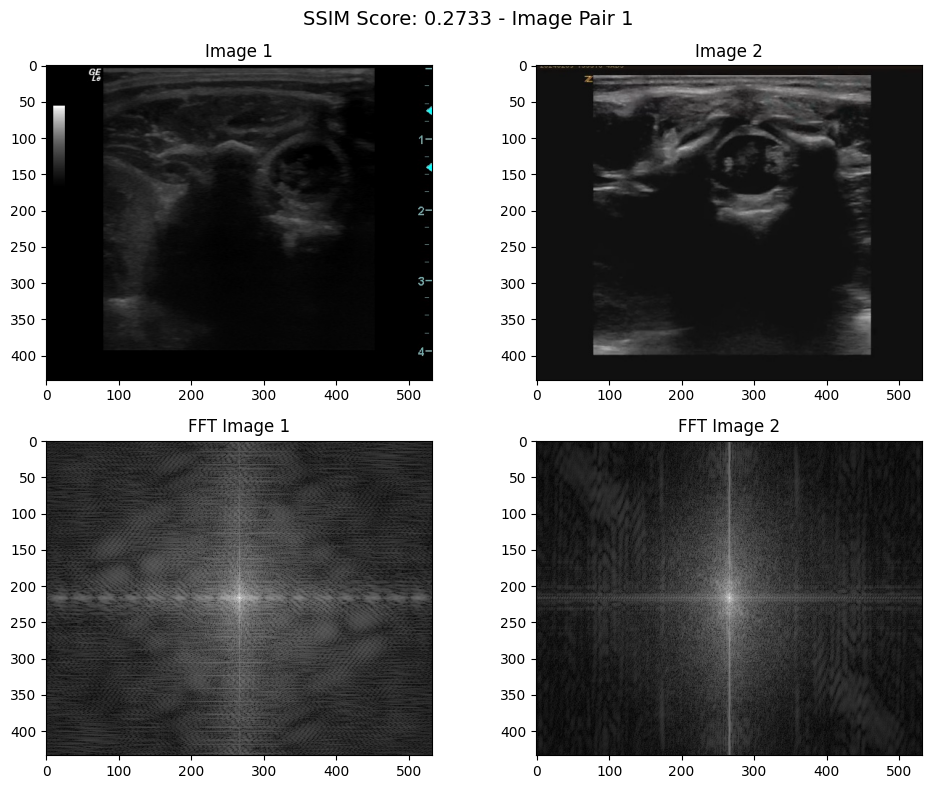

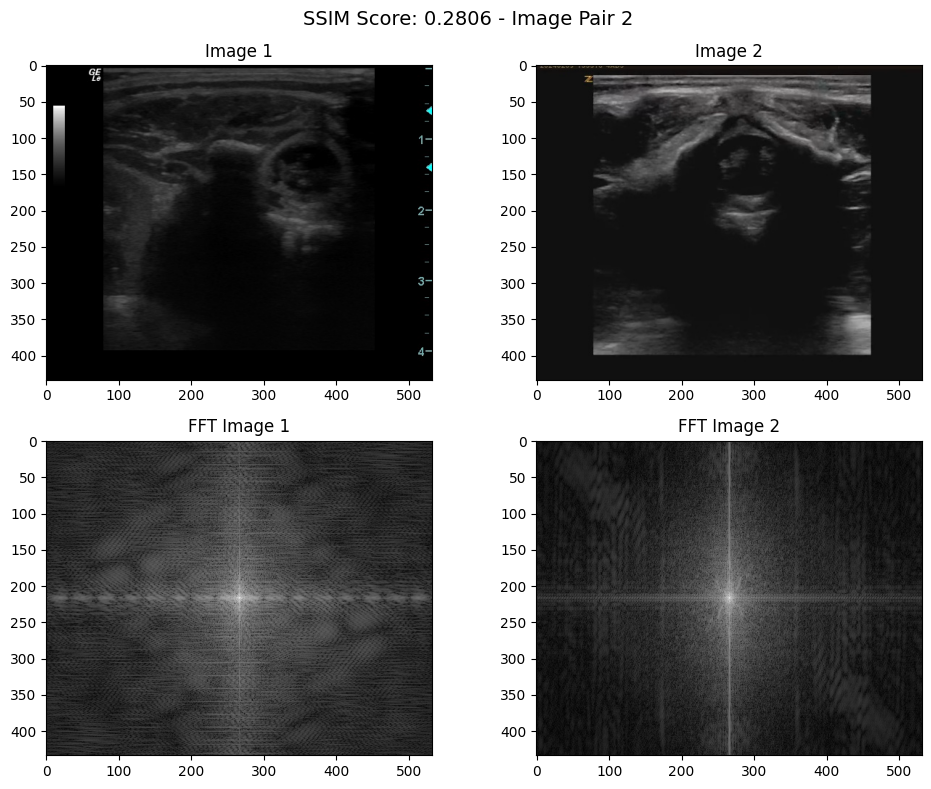

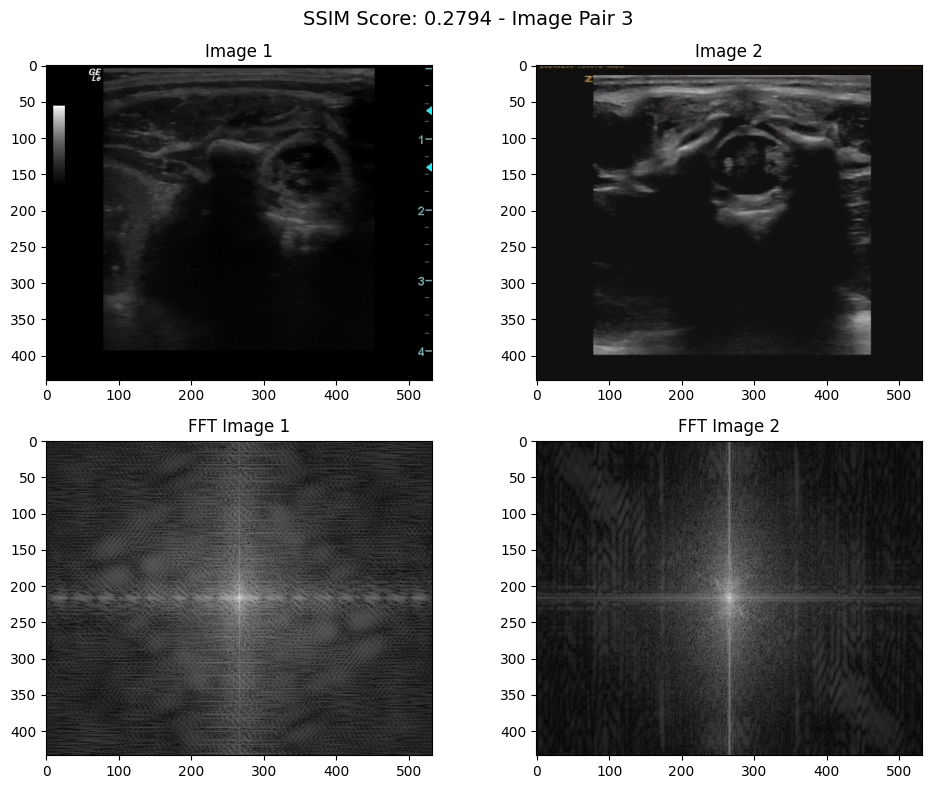

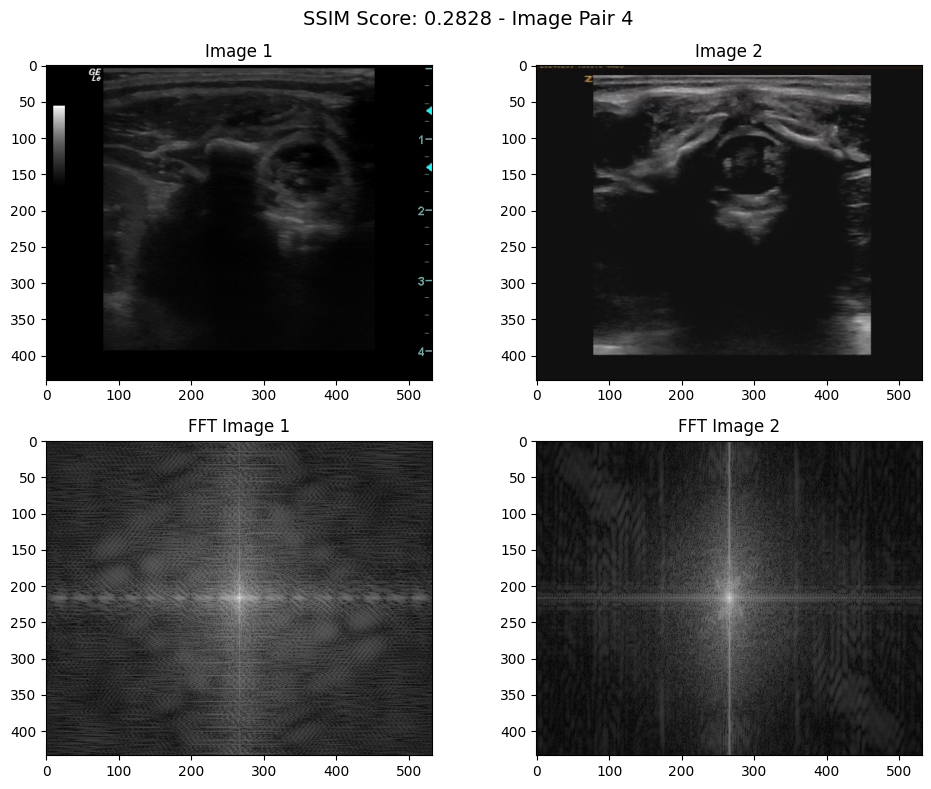

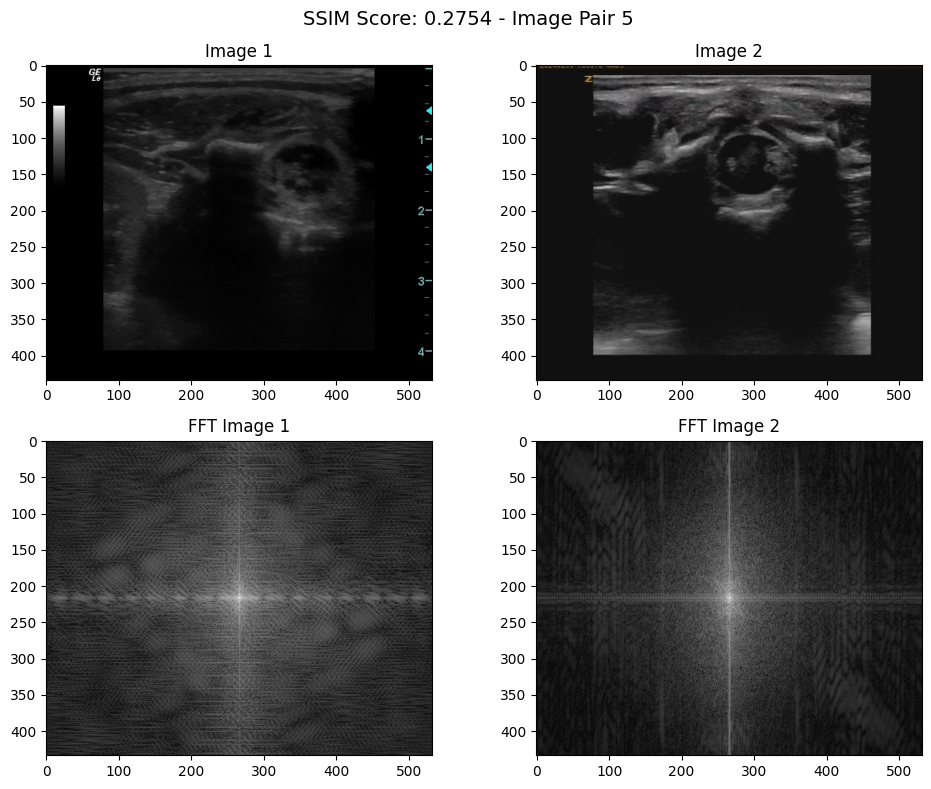

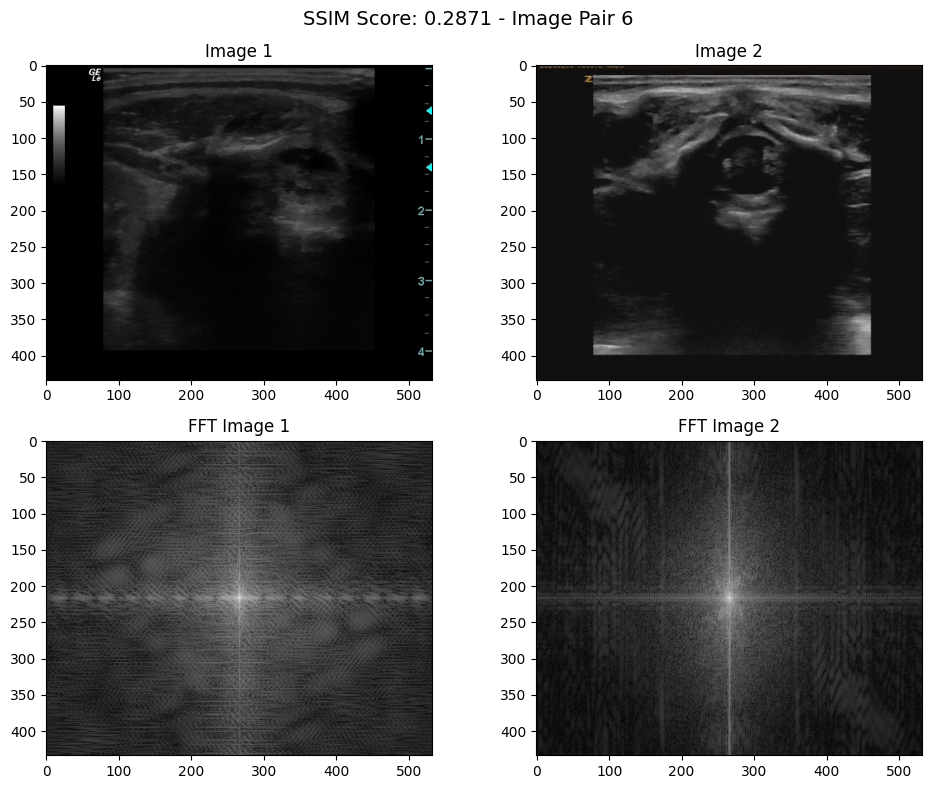

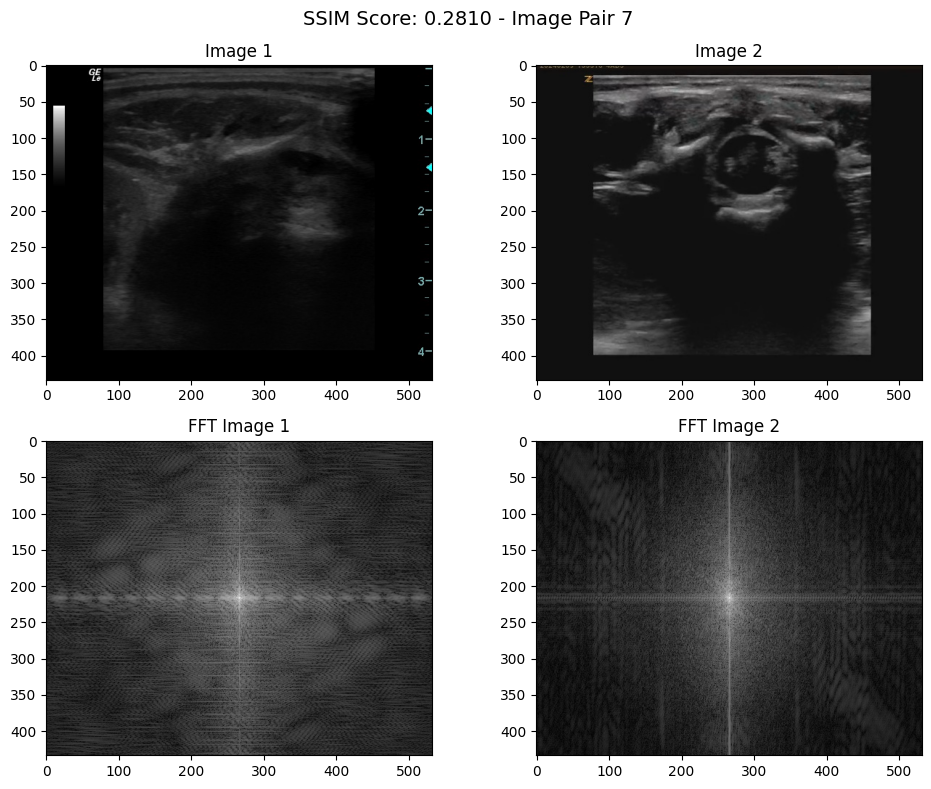

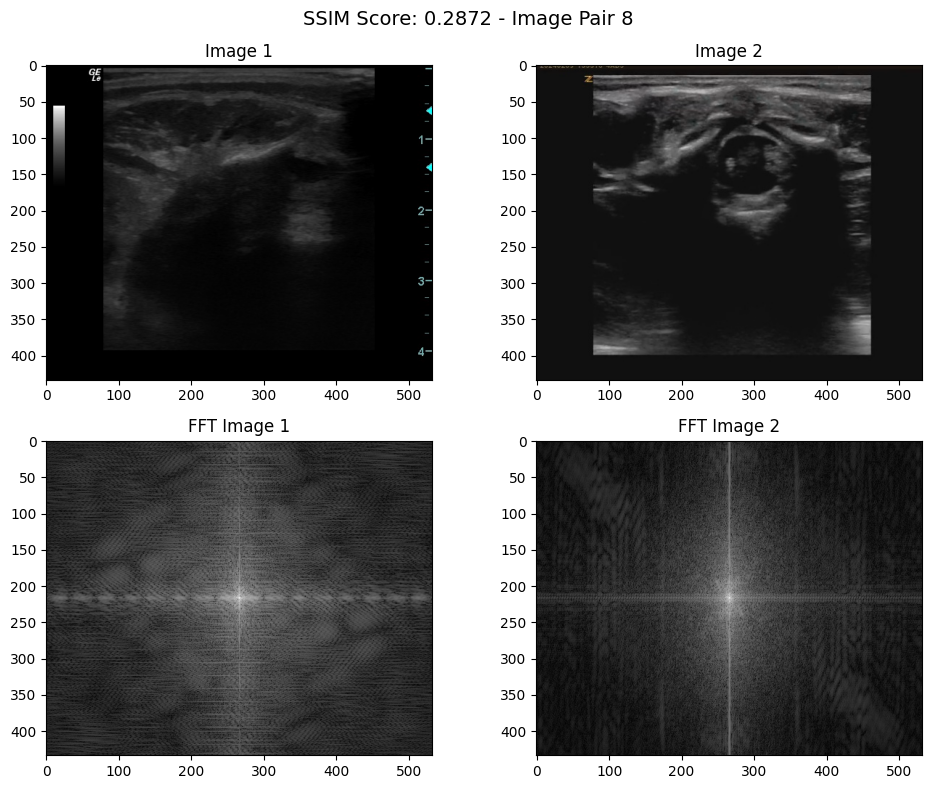

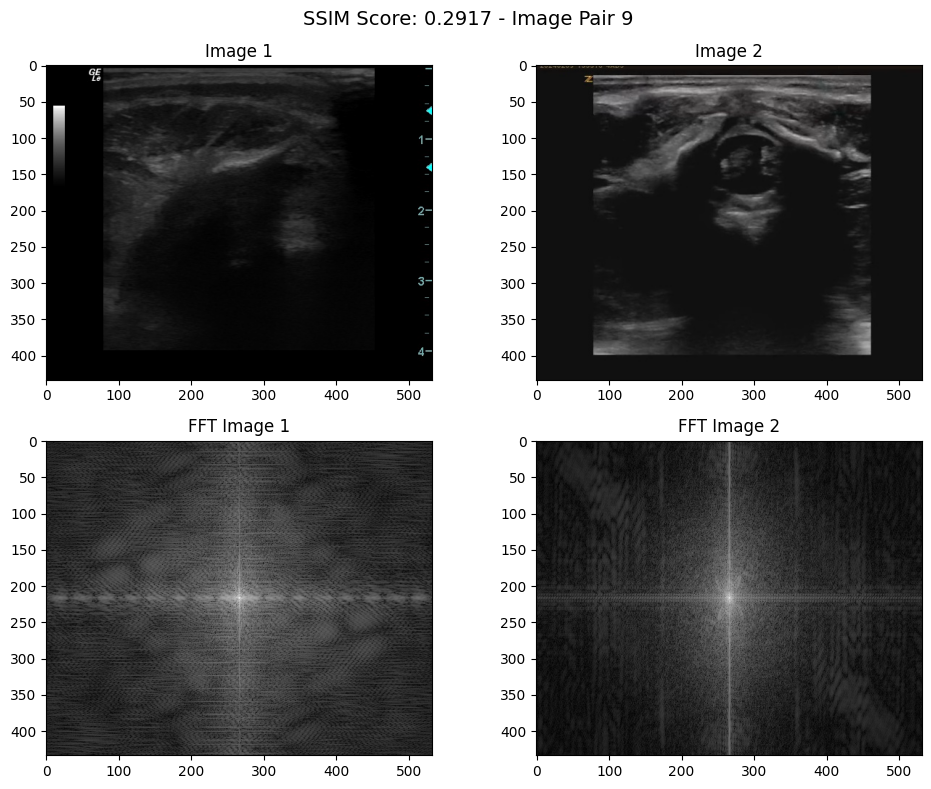

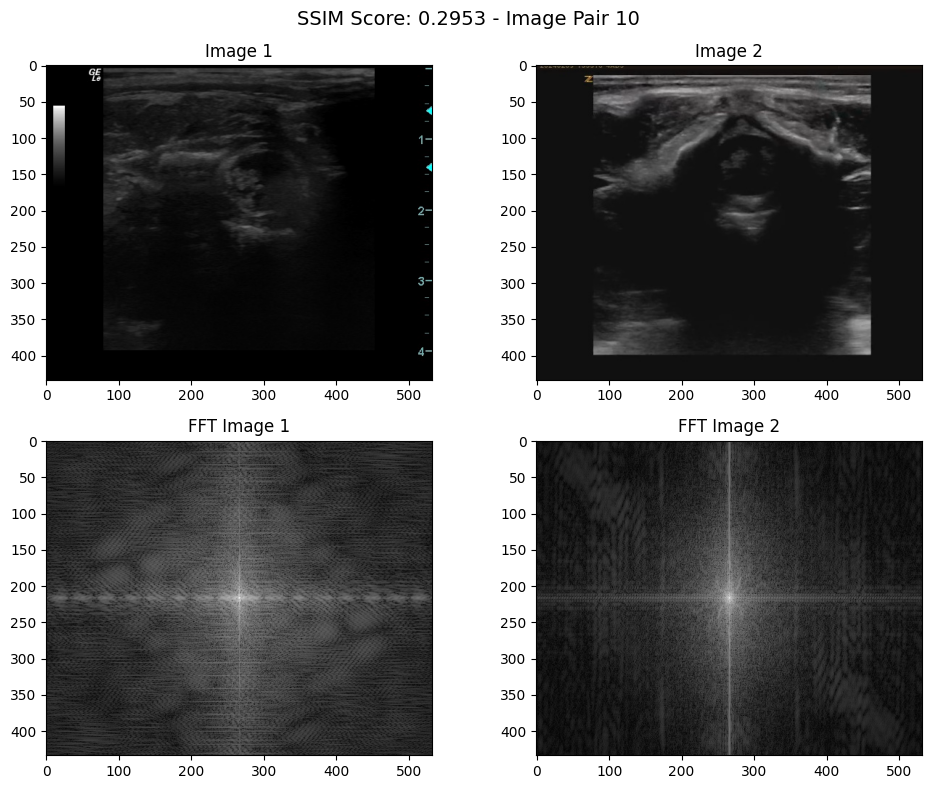

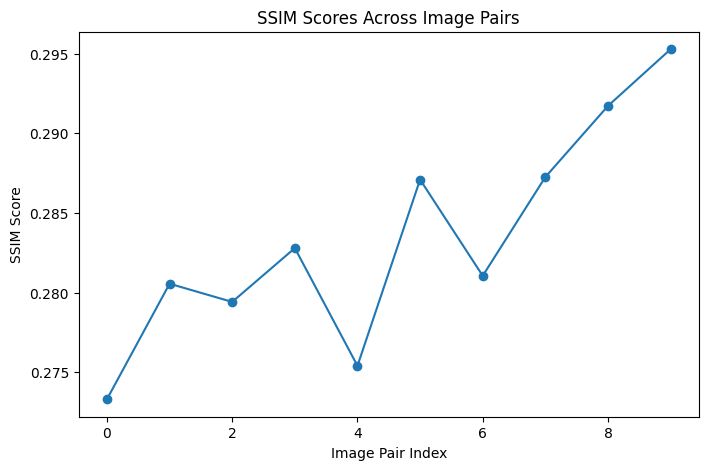

In [68]:
# Function to process loaded images and compare them
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.metrics import structural_similarity as ssim
from scipy.fft import fft2, fftshift
import numpy as np


def process_loaded_images(images1, images2):
    scores = []

    for img1, img2 in zip(images1, images2):
        # Compute SSIM
        score, _ = compare_images(img1, img2)
        scores.append(score)

        # Apply FFT
        fft1 = apply_fft(img1)
        fft2 = apply_fft(img2)

        # Visualize comparison and FFT
        img_name = f"Image Pair {len(scores)}"  # Use image pair index for visualization
        visualize_comparison(img1, img2, fft1, fft2, score, img_name)

    # Plot SSIM score distribution
    plt.figure(figsize=(8, 5))
    plt.plot(scores, marker='o')
    plt.title('SSIM Scores Across Image Pairs')
    plt.xlabel('Image Pair Index')
    plt.ylabel('SSIM Score')
    plt.show()

# Visualization function to display original images and FFT
def visualize_comparison(img1, img2, fft1, fft2, score, img_name):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    axes[0, 0].imshow(img1)
    axes[0, 0].set_title('Image 1')

    axes[0, 1].imshow(img2)
    axes[0, 1].set_title('Image 2')

    axes[1, 0].imshow(fft1, cmap='gray')
    axes[1, 0].set_title('FFT Image 1')

    axes[1, 1].imshow(fft2, cmap='gray')
    axes[1, 1].set_title('FFT Image 2')

    plt.suptitle(f'SSIM Score: {score:.4f} - {img_name}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Example usage with lists of loaded images
# Assuming images1 and images2 are two lists of preloaded images
# Example: images1 = [image1_array, image2_array, ...] and images2 = [image1_array, image2_array, ...]

process_loaded_images(non_nan_images[0:10], loaded_images[0:10])

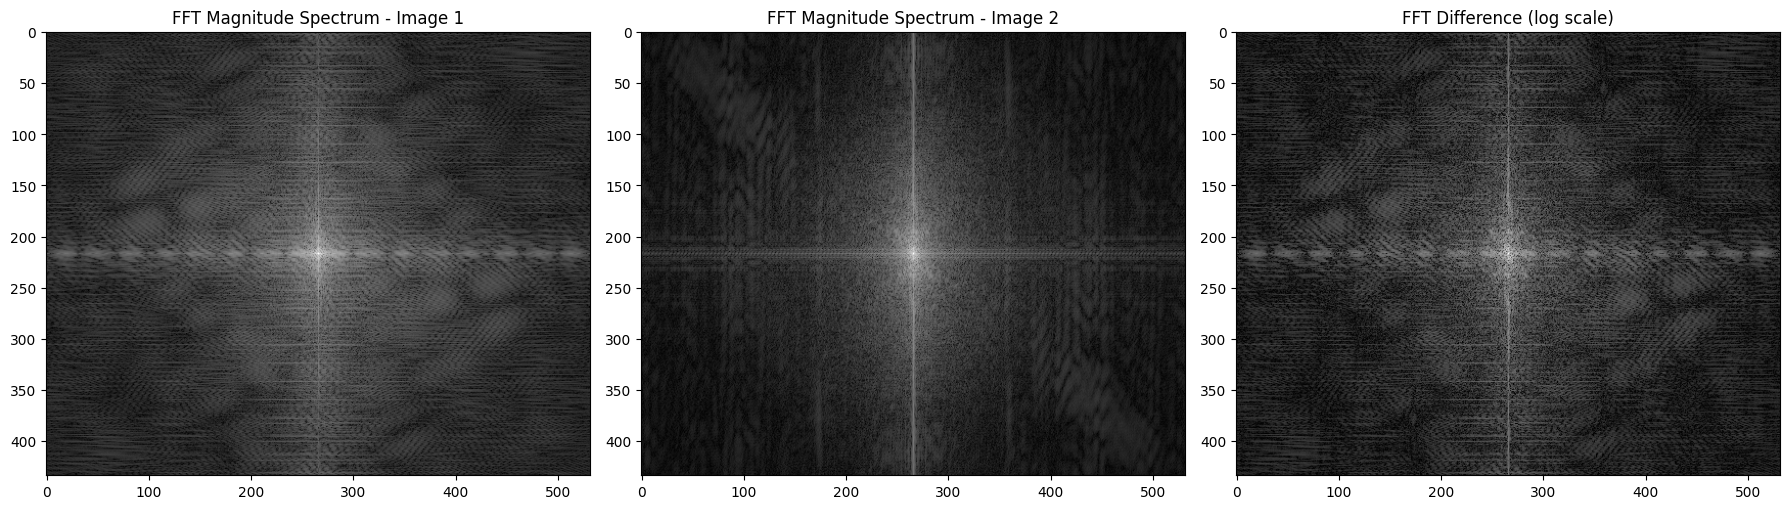

In [69]:
# Function to apply FFT and get the magnitude spectrum
def compute_fft(image):
    gray = rgb2gray(image)  # Convert image to grayscale
    f_transform = fftshift(fft2(gray))  # Shift the zero frequency component to the center
    magnitude_spectrum = np.abs(f_transform)  # Get magnitude spectrum
    return magnitude_spectrum

# Function to compute and visualize the difference between FFT of two images
def compare_fft(image1, image2):
    # Compute FFT for both images
    fft1 = compute_fft(image1)
    fft2 = compute_fft(image2)

    # Compute the absolute difference between the magnitude spectra
    fft_diff = np.abs(fft1 - fft2)

    # Plot the magnitude spectra and their difference
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(np.log(fft1 + 1), cmap='gray')
    axes[0].set_title('FFT Magnitude Spectrum - Image 1')

    axes[1].imshow(np.log(fft2 + 1), cmap='gray')
    axes[1].set_title('FFT Magnitude Spectrum - Image 2')

    axes[2].imshow(np.log(fft_diff + 1), cmap='gray')
    axes[2].set_title('FFT Difference (log scale)')

    plt.tight_layout()
    plt.show()

    return fft_diff

# Example usage with two images (assuming images are already loaded as numpy arrays)
fft_difference = compare_fft(non_nan_images[0], loaded_images[0])

When comparing two FFTs (Fourier Transforms) of different images side by side, there are several observable differences that can help you infer how the images differ. The **FFT** (frequency domain representation) breaks down the image into its constituent frequencies. By analyzing the magnitude spectra (the intensity of frequency components), you can infer structural and textural differences between images. Here's what you can observe:

### Key Differences to Look For:

1. **Low-Frequency Components (Center of FFT)**
   - **Central Region** of the FFT corresponds to **low frequencies**, representing the overall shape and large-scale patterns in the image.
   - **Smooth vs. Complex Structure**: If one FFT has a more concentrated low-frequency region in the center (brighter in the middle), it suggests that the corresponding image has more uniform and smoother patterns. If another image has lower intensity in this region, it may have more intricate structures or details.
   - **Large-scale differences**: Significant changes in shape, orientation, or lighting can be seen here. For instance, an object that dominates one image and is absent or displaced in the other will affect the low-frequency area.

2. **High-Frequency Components (Outer Regions of FFT)**
   - **Outer regions** of the FFT correspond to **high frequencies**, representing fine details and textures in the image (e.g., edges, noise, or sharp features).
   - **Texture & Fine Details**: If one image has more fine details (like sharp edges or noise), its FFT will show brighter points in the outer regions compared to another image that is smoother or blurry.
   - **Blurring**: A blurred image will have fewer high-frequency components (darker outer regions), while a sharp image will have more high-frequency energy (brighter spots in the outer parts of the FFT).

3. **Symmetry or Orientation**
   - The FFT of an image is **often symmetric** with respect to the center.
   - **Rotation**: If one image is a rotated version of another, the FFT will show the same magnitude spectrum, but rotated accordingly. So, you can compare the **orientation of the patterns** in the FFT to see if the images differ by rotation.
   - **Symmetry**: If one image has repetitive or symmetric patterns, it will be reflected in the FFT as bright symmetric spots.

4. **Localized Bright Spots**
   - Bright spots or peaks in the FFT correspond to **dominant periodic patterns** or repeating structures in the image.
   - **Distinct Peaks**: If an image contains regular, repeating patterns (e.g., grids, stripes), these patterns will appear as distinct bright spots in the FFT. If the patterns in the second image are different (e.g., different spatial frequencies), the position and intensity of these bright spots will change.
   - **Directional Edges**: Edges in a specific direction (e.g., vertical or horizontal lines) will result in bright streaks or lines in the FFT. Differences in edge orientation between the two images will be visible in the FFT.

5. **Noise and Artifacts**
   - **High-Frequency Noise**: If one image has more noise or random pixel variations, it will result in more high-frequency components in the FFT. The outer regions of the FFT will appear brighter in noisy images.
   - **Compression Artifacts**: Compressed images (e.g., JPEG compression) may exhibit blocking artifacts or other noise that can introduce artificial high-frequency components, visible as unexpected bright spots in the FFT.

## LPPILOTLAT1

In [ ]:
data_labels = pd.read_excel('/content/drive/MyDrive/shortaxis_binary.xlsx', sheet_name='LPPILOTLAT1')

In [ ]:
data_labels

FILENAME  BAD QUALITY  CORD  FLUID Partial obstruction  \
0      LPPILOTLAT1_0.jpg            1     0      0                 NaN   
1      LPPILOTLAT1_1.jpg            1     0      0                 NaN   
2      LPPILOTLAT1_2.jpg            1     0      0                 NaN   
3      LPPILOTLAT1_3.jpg            1     0      0                 NaN   
4      LPPILOTLAT1_4.jpg            1     0      0                 NaN   
..                   ...          ...   ...    ...                 ...   
283  LPPILOTLAT1_283.jpg            0     1      1                 NaN   
284  LPPILOTLAT1_284.jpg            0     1      1                 NaN   
285  LPPILOTLAT1_285.jpg            0     1      1                 NaN   
286  LPPILOTLAT1_286.jpg            0     1      1                 NaN   
287  LPPILOTLAT1_287.jpg            0     1      1                 NaN   

     NO FLUID good quality  CONUS  
0                      NaN    NaN  
1                      NaN    NaN  
2                      NaN    NaN  
3                      NaN    NaN  
4                      NaN    NaN  
..                     ...    ...  
283                    NaN    NaN  
284                    NaN    NaN  
285                    NaN    NaN  
286                    NaN    NaN  
287                    NaN    NaN  

[288 rows x 7 columns]

In [ ]:
folder_name = data_labels['FILENAME'][0].split('_')[0]

In [ ]:
folder_name

'LPPILOTLAT1'

In [ ]:
import os
import sys

In [ ]:
path = os.path.join('/content/drive/MyDrive/short axis frames', folder_name)

In [ ]:
path

'/content/drive/MyDrive/short axis frames/LPPILOTLAT1'

In [ ]:
data_labels['fname'] = data_labels['FILENAME'].apply(lambda x: x.split('_')[1])

In [ ]:
data_labels.head()

FILENAME  BAD QUALITY  CORD  FLUID Partial obstruction  \
0  LPPILOTLAT1_0.jpg            1     0      0                 NaN   
1  LPPILOTLAT1_1.jpg            1     0      0                 NaN   
2  LPPILOTLAT1_2.jpg            1     0      0                 NaN   
3  LPPILOTLAT1_3.jpg            1     0      0                 NaN   
4  LPPILOTLAT1_4.jpg            1     0      0                 NaN   

   NO FLUID good quality  CONUS  fname  
0                    NaN    NaN  0.jpg  
1                    NaN    NaN  1.jpg  
2                    NaN    NaN  2.jpg  
3                    NaN    NaN  3.jpg  
4                    NaN    NaN  4.jpg

In [ ]:
from PIL import Image
import numpy as np
from tqdm import tqdm

# List of image file names (replace with your actual file names)
image_files = [os.path.join(path,i) for i in list(data_labels['fname'])]  # Example list

# Initialize an empty list to hold the NumPy arrays
image_arrays = []

# Loop through the image files, open each image, and convert to a NumPy array
for image_file in tqdm(image_files):
    # Open the image
    img = Image.open(image_file)

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Append the array to the list
    image_arrays.append(img_array)

100%|██████████| 288/288 [01:52<00:00,  2.56it/s]


In [ ]:
import matplotlib.pyplot as plt

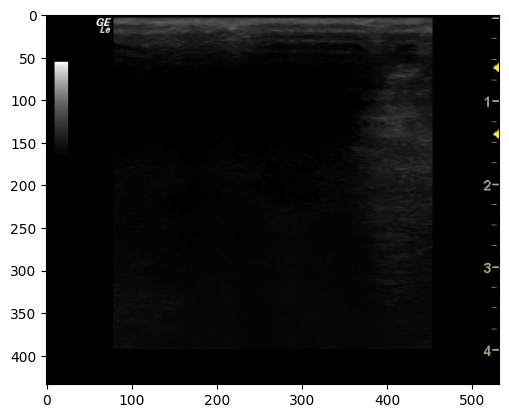

In [ ]:
plt.imshow(image_arrays[0])

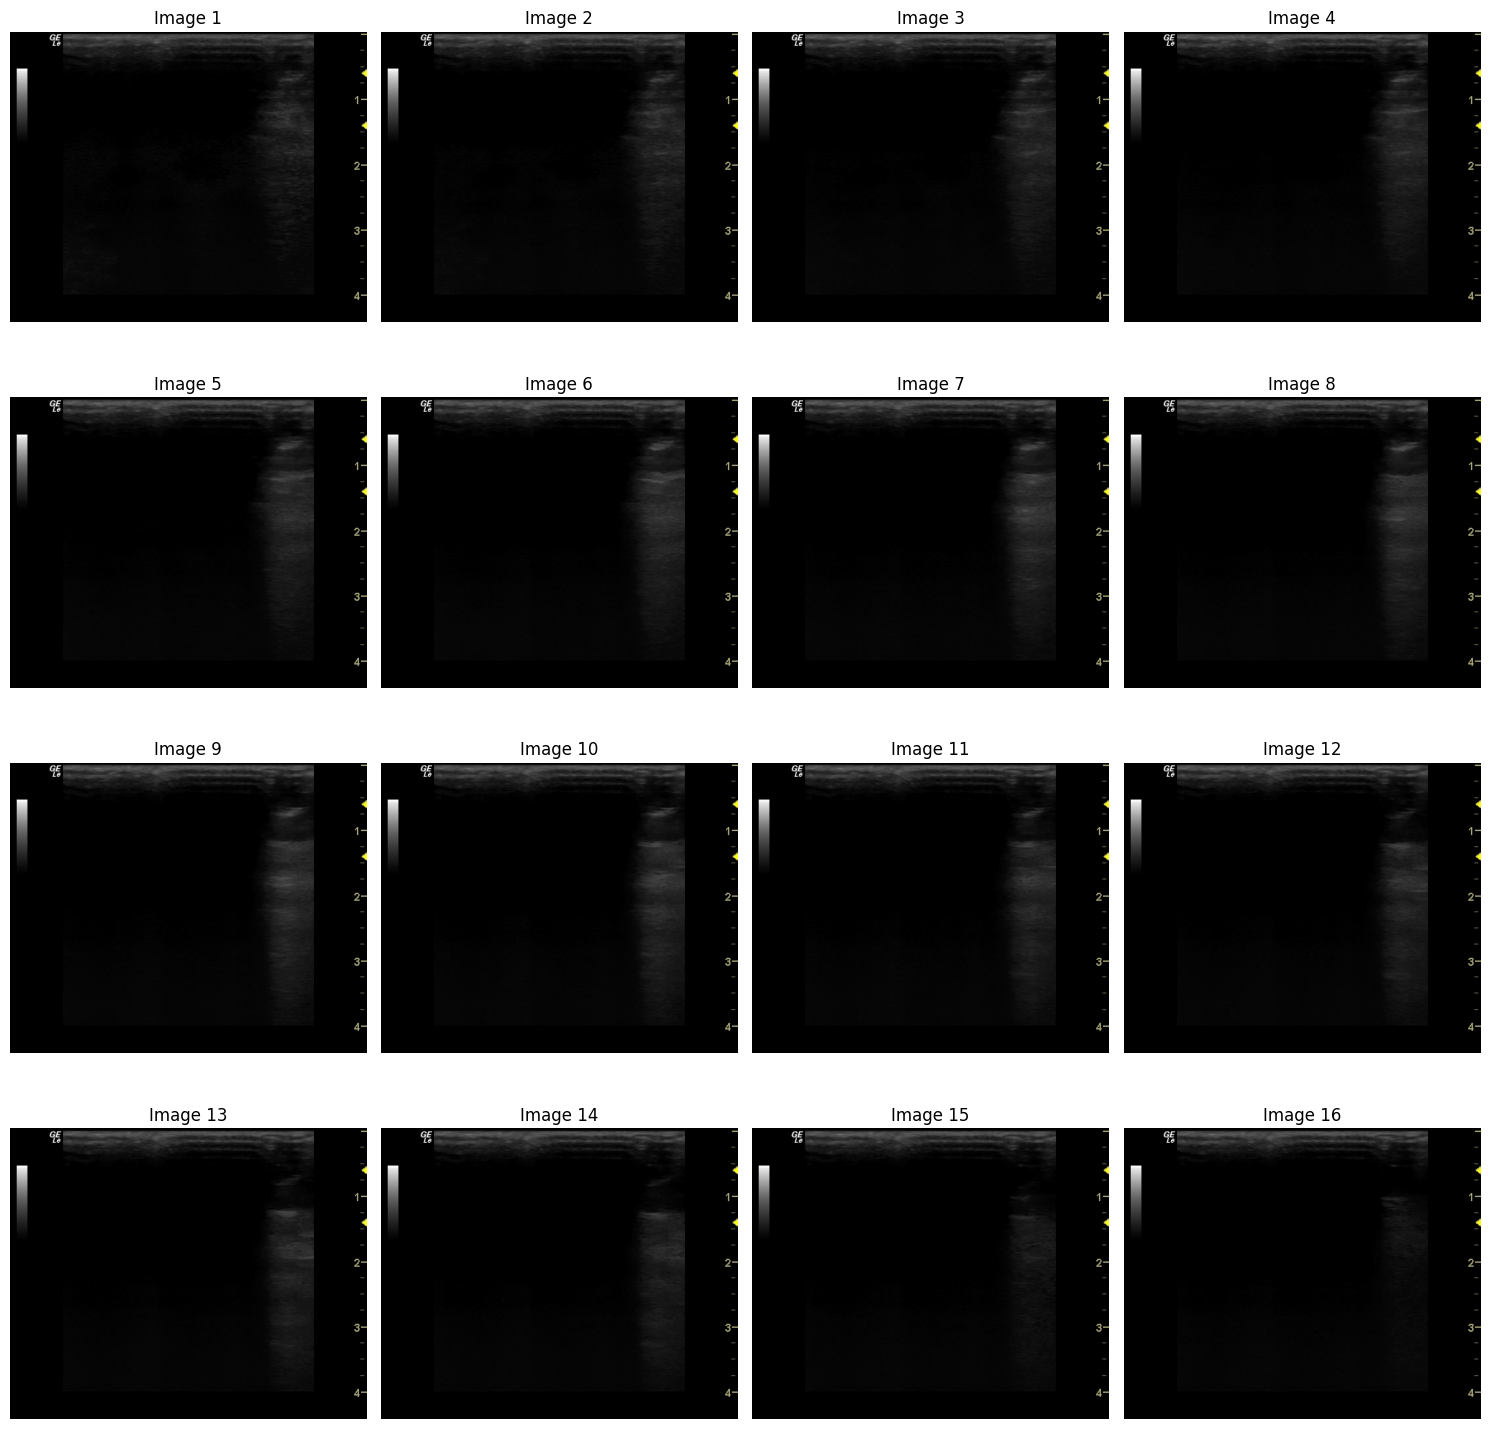

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `images` is your list of numpy arrays (each representing an ultrasound scan)
def plot_montage(images, cols=4, rows=4):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(f'Image {i+1}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
plot_montage(image_arrays)